In [1]:
# import libraries
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read csv
file = ('./adult.csv')
dataset = pd.read_csv(file)

In [4]:
# view dataset
dataset.shape

(48842, 15)

In [5]:
# view first 5 rows
dataset.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
# check the unique of income
dataset['income'].unique()

array(['<=50K', '>50K'], dtype=object)

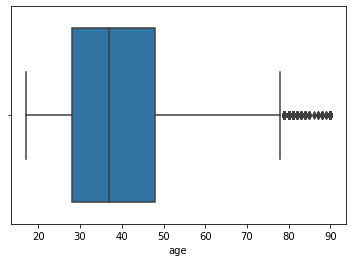

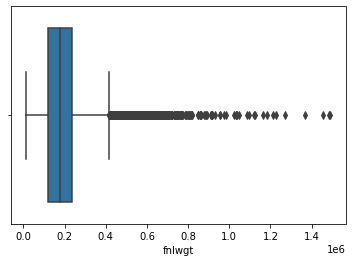

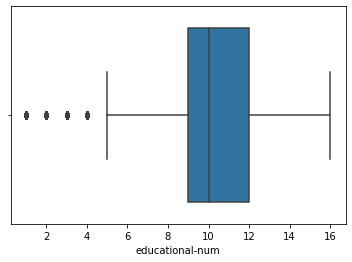

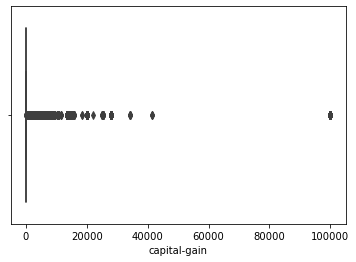

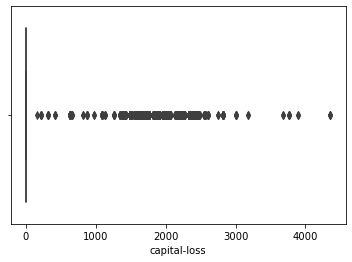

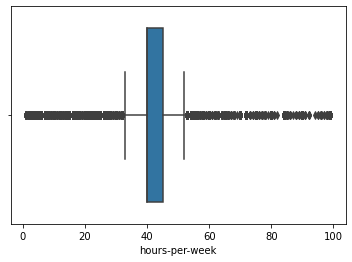

In [7]:
# Check the outliers
numeric = [col for col in dataset.columns if dataset[col].dtypes != object]
for i in numeric:
  sns.boxplot(x = dataset[i])
  plt.show()

In [8]:
dataset = dataset[dataset['capital-gain'] <= 60000] # >60000 is outliner from the graph
dataset = dataset[dataset['capital-loss'] <= 3000] # >3000 is outliner from the graph

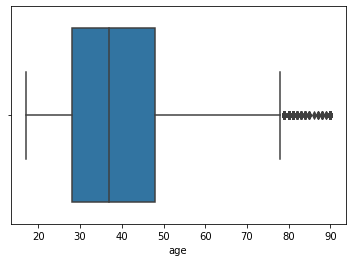

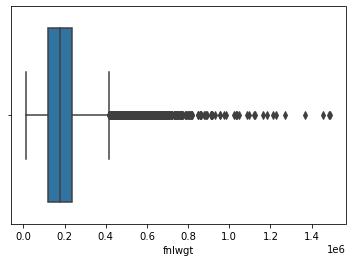

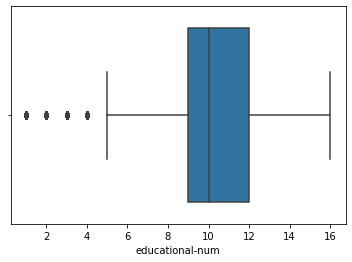

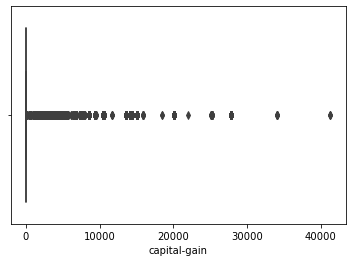

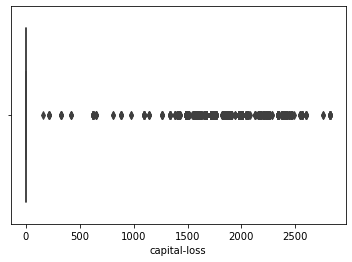

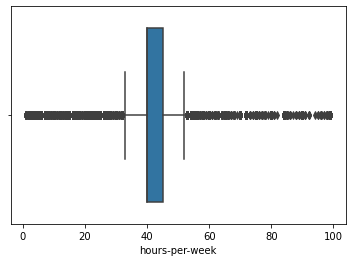

In [9]:
for i in numeric:
  sns.boxplot(x = dataset[i])
  plt.show()

In [10]:
# Check the missing value and replace to nan
dataset = dataset.replace("?",np.NaN)
dataset.isnull().sum()

age                   0
workclass          2792
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2802
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      846
income                0
dtype: int64

In [11]:
# data summary
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48580 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48580 non-null  int64 
 1   workclass        45788 non-null  object
 2   fnlwgt           48580 non-null  int64 
 3   education        48580 non-null  object
 4   educational-num  48580 non-null  int64 
 5   marital-status   48580 non-null  object
 6   occupation       45778 non-null  object
 7   relationship     48580 non-null  object
 8   race             48580 non-null  object
 9   gender           48580 non-null  object
 10  capital-gain     48580 non-null  int64 
 11  capital-loss     48580 non-null  int64 
 12  hours-per-week   48580 non-null  int64 
 13  native-country   47734 non-null  object
 14  income           48580 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.9+ MB


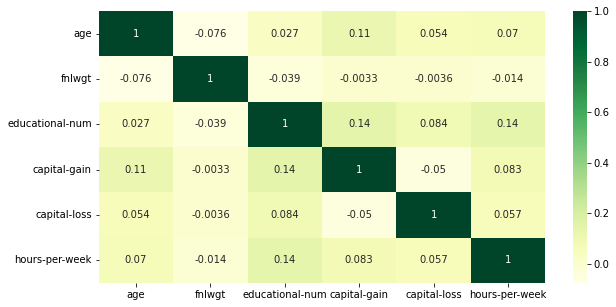

In [12]:
# Check the correlation
plt.rcParams['figure.figsize'] = [10,5]
sns.heatmap(dataset.corr(), annot = True, color = 'blue', cmap = 'YlGn');

In [13]:
dataset[['workclass', 'education', 'marital-status','occupation','relationship','race','gender','native-country','income']].apply(lambda x: x.astype('category'))

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,NaN,Some-college,Never-married,NaN,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [14]:
# use imputer to update the missing value
from sklearn.impute import SimpleImputer
dataset_categorical = dataset[['workclass','occupation','native-country']]
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = imp.fit(dataset_categorical[['workclass','occupation','native-country']])
dataset_categorical = imp.transform(dataset_categorical[['workclass','occupation','native-country']])
dataset_categorical = pd.DataFrame(data=dataset_categorical , columns=[['workclass','occupation','native-country']])
dataset_categorical.head()

,workclass,occupation,native-country
0,Private,Machine-op-inspct,United-States
1,Private,Farming-fishing,United-States
2,Local-gov,Protective-serv,United-States
3,Private,Machine-op-inspct,United-States
4,Private,Craft-repair,United-States


In [15]:
dataset[['workclass','occupation','native-country']] = dataset_categorical[['workclass','occupation','native-country']]

In [16]:
# data summary after update missing data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48580 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48580 non-null  int64 
 1   workclass        48319 non-null  object
 2   fnlwgt           48580 non-null  int64 
 3   education        48580 non-null  object
 4   educational-num  48580 non-null  int64 
 5   marital-status   48580 non-null  object
 6   occupation       48319 non-null  object
 7   relationship     48580 non-null  object
 8   race             48580 non-null  object
 9   gender           48580 non-null  object
 10  capital-gain     48580 non-null  int64 
 11  capital-loss     48580 non-null  int64 
 12  hours-per-week   48580 non-null  int64 
 13  native-country   48319 non-null  object
 14  income           48580 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.9+ MB


In [17]:
# Statistical details of data
dataset.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48580.000000,4.858000e+04,48580.000000,48580.000000,48580.000000,48580.000000
mean,38.597468,1.896968e+05,10.063380,582.627933,86.642734,40.372664
std,13.707435,1.056329e+05,2.562662,2537.096596,398.257519,12.370069
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175558e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782465e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.377148e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,41310.000000,2824.000000,99.000000


In [18]:
dataset.replace(('<=50K', '>50K'), (0, 1), inplace = True)

In [19]:
# find all categorical to plot data
categorical = [col for col in dataset.columns if dataset[col].dtype == object]
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

In [20]:
sns.set(rc={'figure.figsize':(12,8)})

/Users/karchunkan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

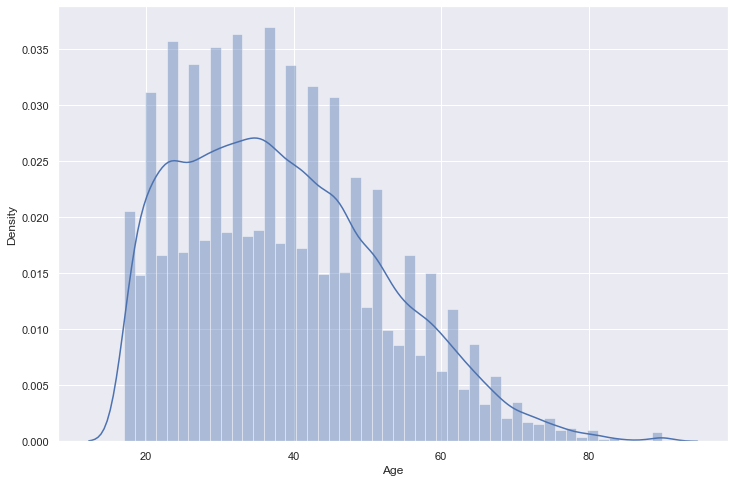

In [21]:
# Age distribution
sns.distplot(x=dataset['age'], axlabel='Age')

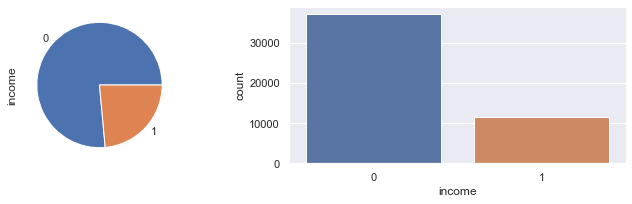

In [22]:
# cchart for distribution of income
fig= plt.figure(figsize=(10,3) )
fig.add_subplot(1,2,1)
a= dataset["income"].value_counts(normalize=True).plot.pie()
fig.add_subplot(1,2,2)
churnchart=sns.countplot(x=dataset["income"])
plt.tight_layout()
plt.show()

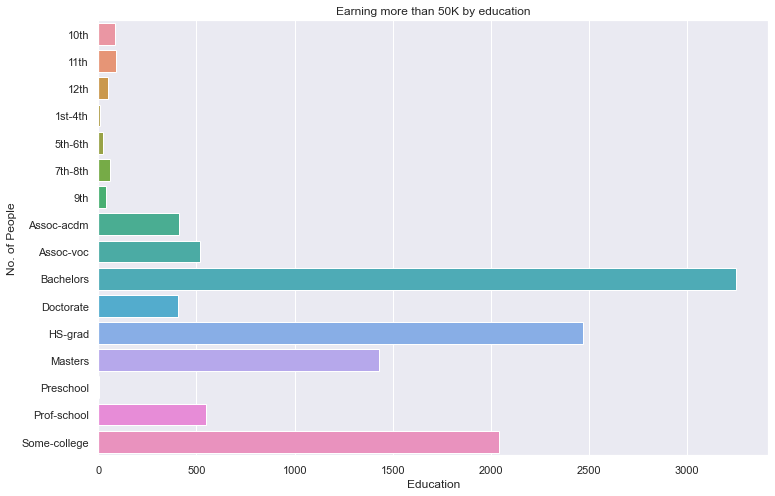

In [23]:
income_50K = dataset.loc[dataset['income'] == 1, ['education']].groupby('education').size()

# Barplot for the people who earns more than 50K by their education
fig = sns.barplot(x = list(income_50K), y = list(income_50K.index))
plt.xlabel("Education")
plt.ylabel("No. of People")
plt.title("Earning more than 50K by education")
plt.show(fig)

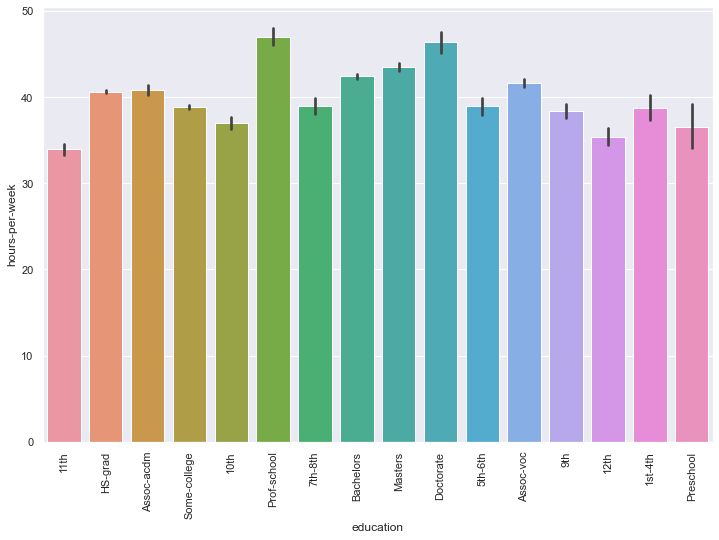

In [24]:
# Hours per week by education
sns_grad = sns.barplot(x = dataset['education'], y = dataset['hours-per-week'], data = dataset)
plt.setp(sns_grad.get_xticklabels(), rotation=90);

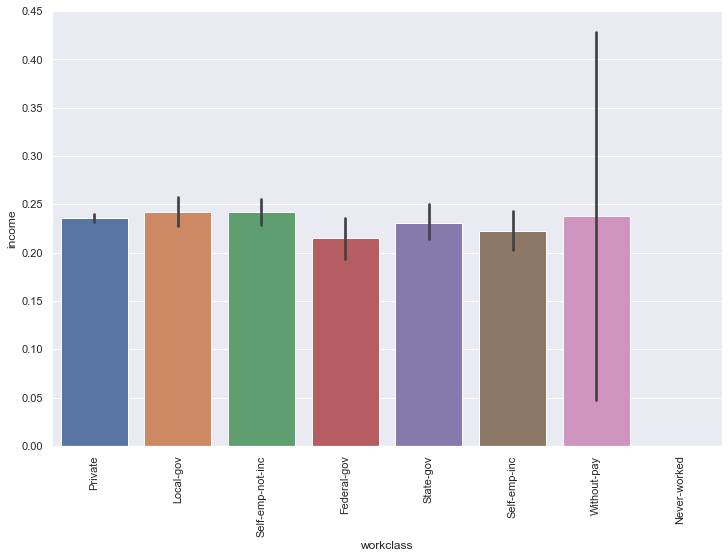

In [25]:
# Income by workclass
sns_grad = sns.barplot(x = dataset['workclass'], y = dataset['income'], data = dataset)
plt.setp(sns_grad.get_xticklabels(), rotation=90);

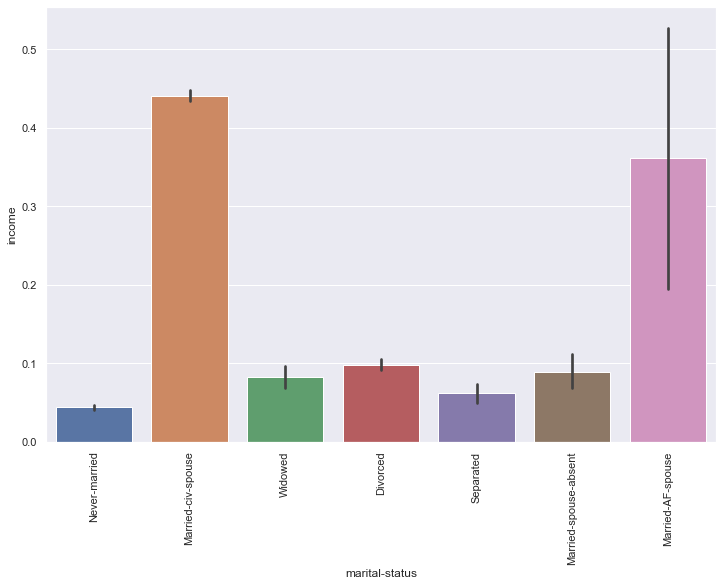

In [26]:
# Income by marital status
sns_grad = sns.barplot(x = dataset['marital-status'], y = dataset['income'], data = dataset)
plt.setp(sns_grad.get_xticklabels(), rotation=90);

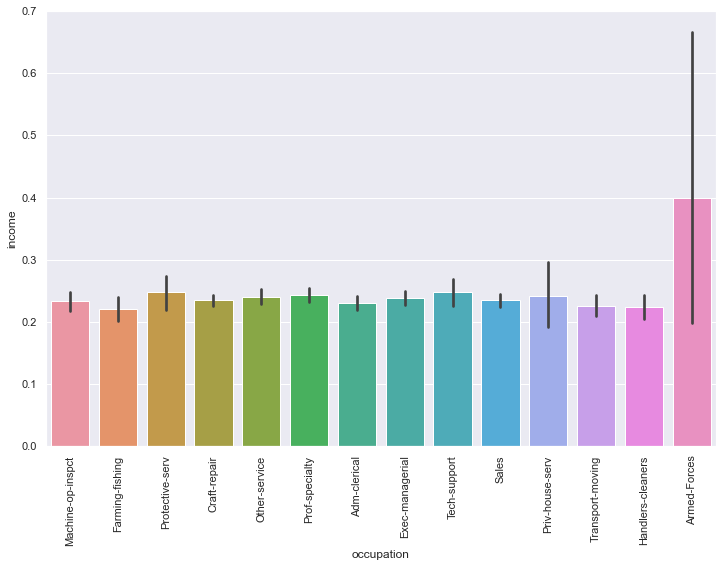

In [27]:
# Income by occupation
sns_grad = sns.barplot(x = dataset['occupation'], y = dataset['income'], data = dataset)
plt.setp(sns_grad.get_xticklabels(), rotation=90);

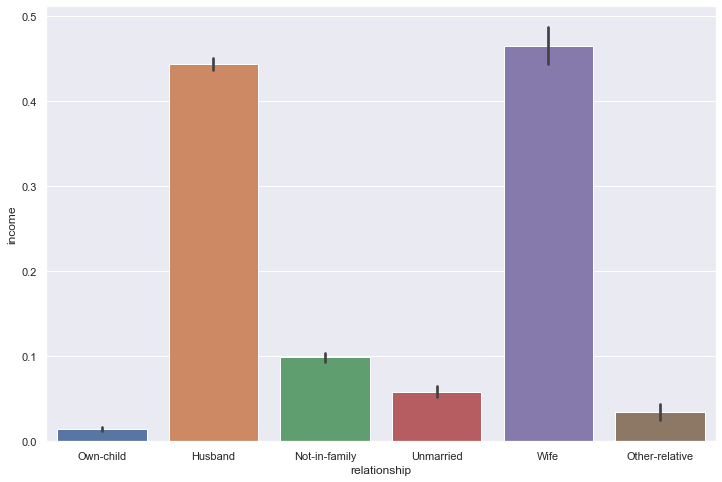

In [28]:
# Income by relationship
sns_grad = sns.barplot(x = dataset['relationship'], y = dataset['income'], data = dataset)

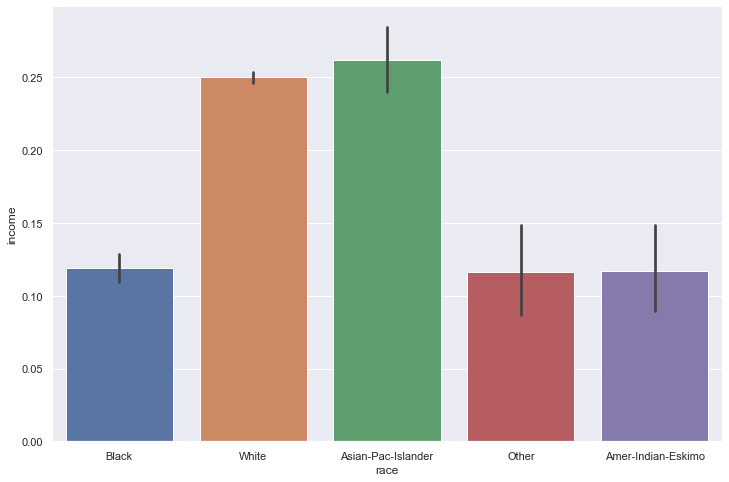

In [29]:
# Income by race
sns_grad = sns.barplot(x = dataset['race'], y = dataset['income'], data = dataset)

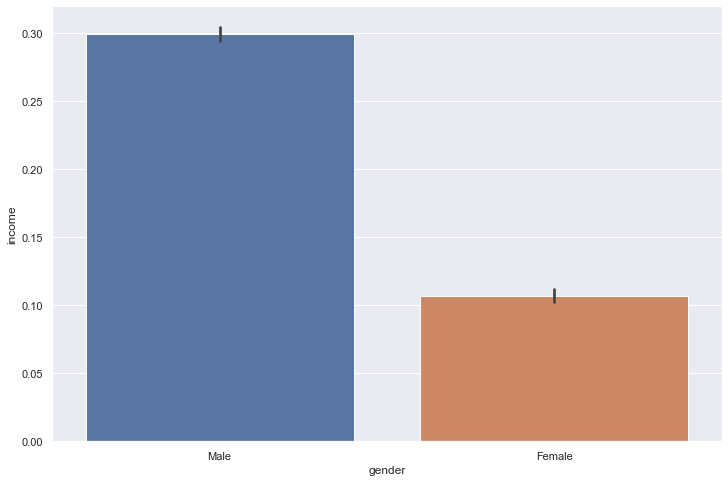

In [30]:
# Income by gender
sns_grad = sns.barplot(x = dataset['gender'], y = dataset['income'], data = dataset)

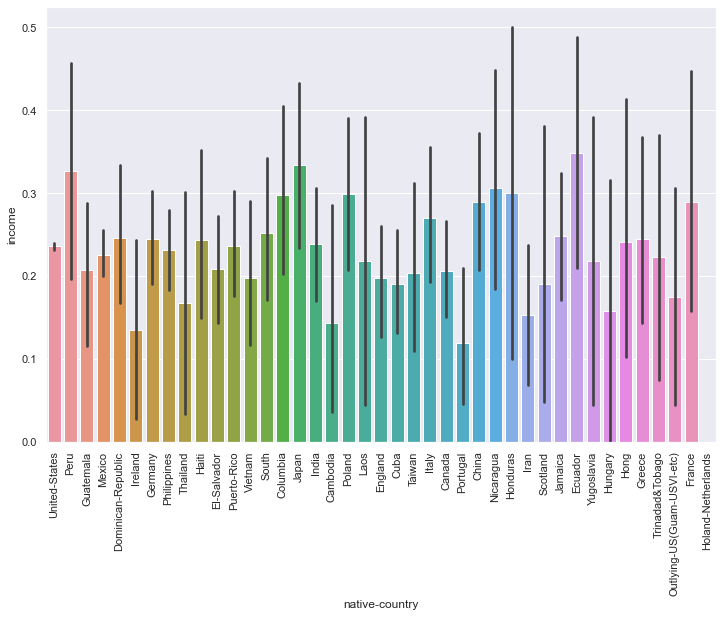

In [31]:
# Income by native country
sns_grad = sns.barplot(x = dataset['native-country'], y = dataset['income'], data = dataset)
plt.setp(sns_grad.get_xticklabels(), rotation=90);

In [32]:
# use income as the target
X = dataset.drop(['income'], axis=1)
y = dataset['income']

In [33]:
# set the training size to 0.8 and testing size to 0.2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [35]:
# check vif
numeric = [col for col in X.columns if X[col].dtypes != object]
dt = X[numeric]
calc_vif(dt)

,variables,VIF
0,age,7.192151
1,fnlwgt,3.692919
2,educational-num,10.863850
3,capital-gain,1.076054
4,capital-loss,1.059603
5,hours-per-week,9.681307


In [36]:
# drop variable because of multicollinearity
X = X.drop('educational-num', axis = 1)

In [37]:
# check vif after drop a variable
numeric = [col for col in X.columns if X[col].dtypes != object]
dt = X[numeric]
calc_vif(dt)

,variables,VIF
0,age,6.078260
1,fnlwgt,3.466122
2,capital-gain,1.071110
3,capital-loss,1.056673
4,hours-per-week,6.779439


In [38]:
# setup feature
from sklearn import preprocessing

categorical = list(dataset.select_dtypes(include=['object']).columns)
for feature in categorical:
        labelEncoder = preprocessing.LabelEncoder()
        X_train[feature] = labelEncoder.fit_transform(X_train[feature])
        X_test[feature] = labelEncoder.transform(X_test[feature])

In [39]:
# train model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, f1_score

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print('Logistic Regression accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score: 0.7886


In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
# check the keys of logistic regression
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [42]:
# Get the best model by lasso or ridge
grid={"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty":["l1","l2"]}# l1 lasso l2 ridge
log_reg_cv=GridSearchCV(log_reg,grid,cv=10)
log_reg_cv.fit(X_train,y_train)

print("tuned best parameters: ",log_reg_cv.best_params_)
print("accuracy :",log_reg_cv.best_score_)

/Users/karchunkan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karchunkan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karchunkan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/karchunkan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/

tuned best parameters:  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.7922749876496884


/Users/karchunkan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.79227499        nan 0.78985649        nan 0.78929036
        nan 0.79006231        nan 0.7899337         nan 0.79016533
        nan 0.79011383]
  warnings.warn(


In [43]:
# use the best parameters
best_model_logr = LogisticRegression(C=0.001, penalty='l2')
best_model_logr.fit(X_train, y_train)
pred_logr = best_model_logr.predict(X_test)
print("Logistic Regression accuracy score:{0:0.3f}". format(accuracy_score(y_test, pred_logr)))
print("f1 score : ", f1_score(y_test, pred_logr, average = 'binary'))

Logistic Regression accuracy score:0.789
f1 score :  0.3737404580152672


In [44]:
# Get classification report
print (classification_report(y_test, pred_logr))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      7429
           1       0.62      0.27      0.37      2287

    accuracy                           0.79      9716
   macro avg       0.71      0.61      0.62      9716
weighted avg       0.76      0.79      0.76      9716



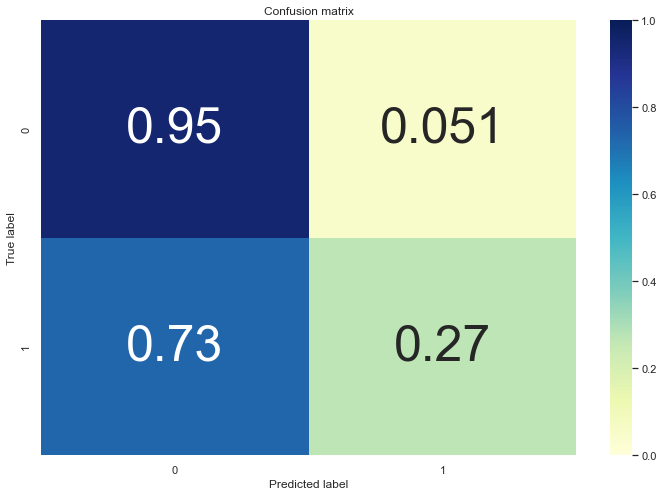

In [45]:
#Confusion Matrix 

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Visualizing cm

cm = confusion_matrix(y_test,pred_logr) 
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = best_model_logr.classes_, title='Confusion matrix')

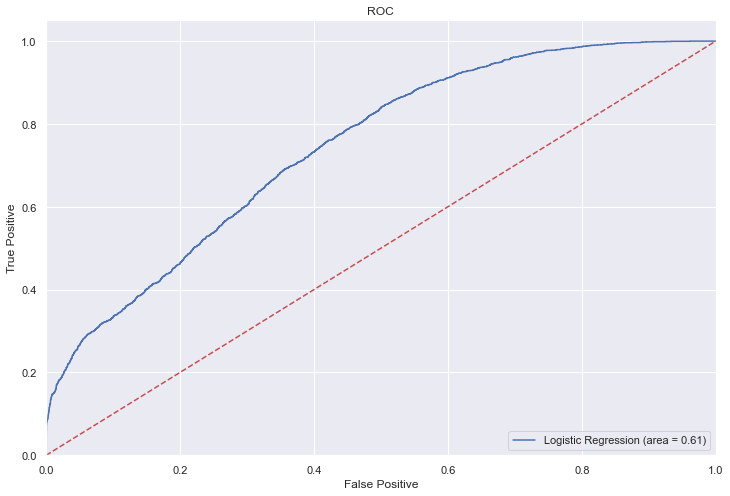

In [46]:
# Get roc auc of the model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc = roc_auc_score(y_test, best_model_logr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, best_model_logr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

In [47]:
# Running Log loss on training
pred_proba = best_model_logr.predict_proba(X_train)
from sklearn.metrics import log_loss
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

# Running Log loss on testing
pred_proba_t = best_model_logr.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))

The Log Loss on Training is:  0.4750828265227948
The Log Loss on Testing Dataset is:  0.4768897342661496
